## nInputs analysis
Analysis of the results of the nInputs experiment for the morphologically detailed CA1 pyramidal cell model. 

nInputs data generated with `morpho/scripts/nInputs.py`, batch ran using dSQ and the joblist `morpho/scripts/nInputs_dSQ_joblist.txt`, ground truth simulations of the conductance-based model simulated with `morpho/scripts/nInputs_groundtruth_sims.py`. Requires stimuli locations files to be generated beforehand using the `morpho/scripts/initialize_stimuli_locs.py` script.

Raster plots of the ground truth conductance-based models are compared to the resulting spike trains of the n Inputs experiments, for the CA1 pyramidal cell. Additionally, van Rossum spike distances measured between the spike trains. 

In [1]:
import numpy as np
import json
import os

import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib as mpl

from neuron import h

import elephant.statistics as estats
import elephant
import neo
from elephant.spike_train_dissimilarity import victor_purpura_distance
from elephant.spike_train_dissimilarity import van_rossum_distance
from quantities import ms, s, Hz

import sys
sys.path.insert(1, "../utils/")
import Stimuli, Pyr

In [2]:
duration = 10000
ns = list(range(1,11))

figures_dir = '../figures/'

## read stimuli

In [3]:
path2stimulifile = '../data/morpho/nInputs_palmerscratch_stimuli/stim_times_0.json'

with open(path2stimulifile, 'r') as fin:
    stim_times = json.load(fin)

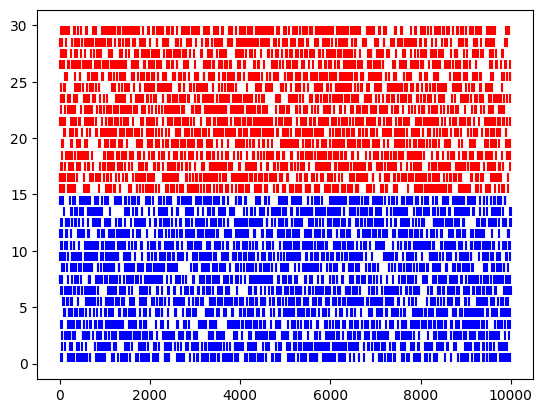

In [4]:
for stim_loc in stim_times:
    if int(stim_loc) >=15:
        stim_color = 'red'
    else:
        stim_color = 'blue'
    plt.vlines(stim_times[stim_loc], int(stim_loc) + 0.1, int(stim_loc) + .9, color = stim_color)

## read spikes

In [5]:
path2spikes = '../data/morpho/nInputs_palmerscratch_spikes/'

ns = np.arange(1,11)

seg_locIDs = list(set([file.split('_')[2] for file in os.listdir(path2spikes)]))
seg_locIDs

['ID92',
 'ID22',
 'ID90',
 'ID50',
 'ID88',
 'ID70',
 'ID48',
 'ID71',
 'ID21',
 'ID19',
 'ID36',
 'ID84',
 'ID25',
 'ID69',
 'ID2',
 'ID81',
 'ID87',
 'ID55',
 'ID99',
 'ID96']

In [6]:
seg_loc_firing_rates = {}
for file in os.listdir('../data/morpho/segment_arrays/'):
    seg_locID = file.split('_')[3].strip('.npy')
    if seg_locID in seg_locIDs:
        seg_loc_firing_rates[seg_locID] = float(file.split('_')[2].strip('Hz'))

In [7]:
spikes = {seg_locID:{} for seg_locID in seg_locIDs}

missing_files = []
for seg_locID in seg_locIDs:
    for n in ns:
        try:
            _spikes0 = np.load(f'{path2spikes}spikes_0_{seg_locID}_{n}.npy')
        except:
            _spikes0 = np.zeros(0)
            missing_files.append(f'spikes_0_{seg_locID}_{n}.npy')
        try:
            _spikes1 = np.load(f'{path2spikes}spikes_1_{seg_locID}_{n}.npy')
            spikes[seg_locID][n] = _spikes1
        except:
            _spikes1 = np.zeros(0)
            missing_files.append(f'spikes_1_{seg_locID}_{n}.npy')

## load ground truth responses

In [9]:
path2simspikes = '../data/morpho/nInputs_groundtruth_sims/'

groundtruthspikes = {}
for seg_locID in seg_locIDs:
    groundtruthspikes[seg_locID] = np.load(f'{path2simspikes}groundtruth_spikes_{seg_locID}_palmerscratch.npy')

## visualize rasters

In [10]:
def spike_dif_thresh(spike_dif):
    if spike_dif < 10:
        return 'black'
    else:
        return 'red'

ID19


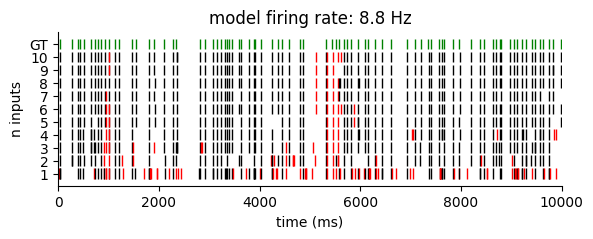

In [12]:
seg_locID = 'ID19'
print(seg_locID)

ns = np.arange(1,11)

fig, axes = plt.subplots(1, 1, figsize = (6.5, 2))

gt_spikes = groundtruthspikes[seg_locID]

for n in ns:
    spike_difs = [
        min([abs(spike-gt_spike) for gt_spike in gt_spikes]) for spike in spikes[seg_locID][n]
    ]
    colors = [spike_dif_thresh(spike_dif) for spike_dif in spike_difs]
    axes.vlines(spikes[seg_locID][n], n-.4, n+.4, color=colors, linewidth=1)
    
axes.vlines(groundtruthspikes[seg_locID], 11-.4, 11+.4, color='green', linewidth=1)

plt.xlim(0, 10000)

plt.yticks(list(range(1,12)), list(range(1,11)) + ['GT'])

plt.xlabel('time (ms)')
plt.ylabel('n inputs')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.title(f'model firing rate: {seg_loc_firing_rates[seg_locID]} Hz')

plt.savefig(f'{figures_dir}nInputs_morpho_{seg_locID}_rasters.svg', format='svg')

plt.show()

ID21


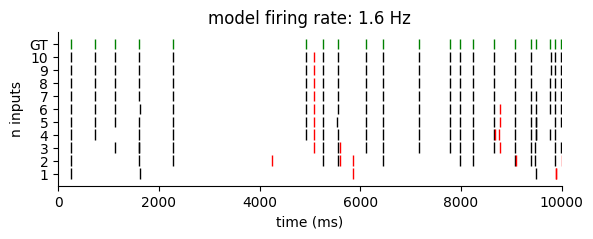

In [13]:
seg_locID = 'ID21'
print(seg_locID)

ns = np.arange(1,11)

fig, axes = plt.subplots(1, 1, figsize = (6.5, 2))

gt_spikes = groundtruthspikes[seg_locID]

for n in ns:
    spike_difs = [
        min([abs(spike-gt_spike) for gt_spike in gt_spikes]) for spike in spikes[seg_locID][n]
    ]
    colors = [spike_dif_thresh(spike_dif) for spike_dif in spike_difs]
    axes.vlines(spikes[seg_locID][n], n-.4, n+.4, color=colors, linewidth=1)
    
axes.vlines(groundtruthspikes[seg_locID], 11-.4, 11+.4, color='green', linewidth=1)

plt.xlim(0, 10000)

plt.yticks(list(range(1,12)), list(range(1,11)) + ['GT'])

plt.xlabel('time (ms)')
plt.ylabel('n inputs')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.title(f'model firing rate: {seg_loc_firing_rates[seg_locID]} Hz')

plt.savefig(f'{figures_dir}nInputs_morpho_{seg_locID}_rasters.svg', format='svg')

plt.show()

In [15]:
spikes[seg_locID][10]

array([ 254.97947006,  734.69681018, 1136.78197945, 1617.25057441,
       2279.83391866, 4917.8971051 , 5075.28085122, 5254.31083292,
       5547.92836789, 6110.66741713, 6456.64458127, 7161.72798485,
       7783.58259054, 7973.84009053, 8238.98459142, 8656.43432162,
       9072.736225  , 9391.6036654 , 9776.70337184, 9870.5906888 ,
       9984.67286566])

ID96


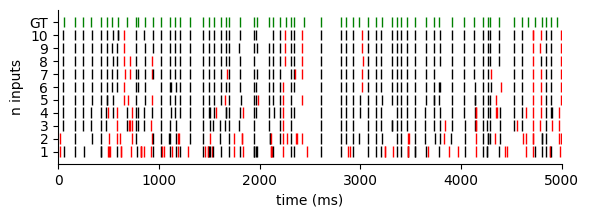

ID90


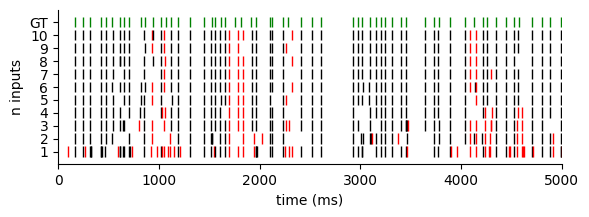

ID19


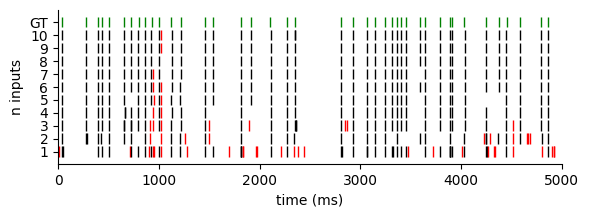

ID71


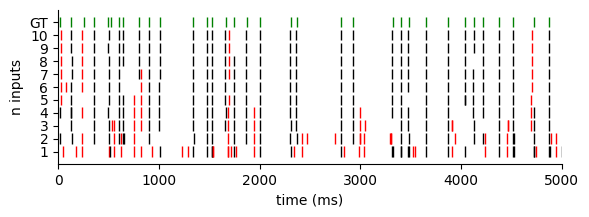

ID69


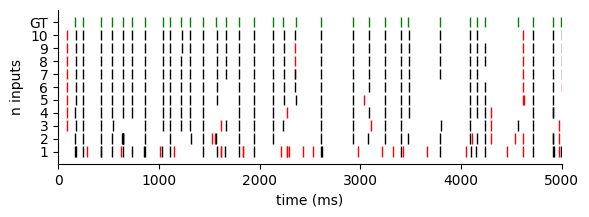

ID70


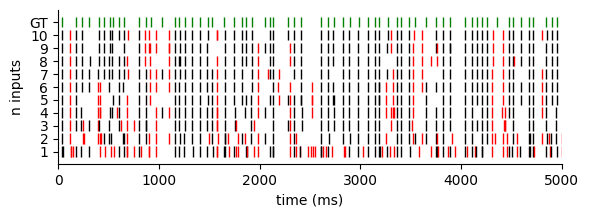

ID92


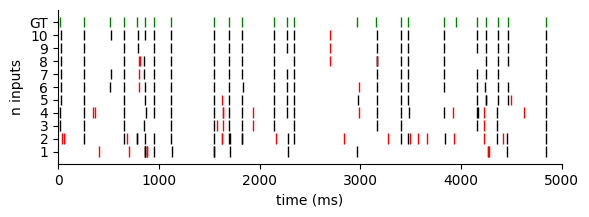

ID48


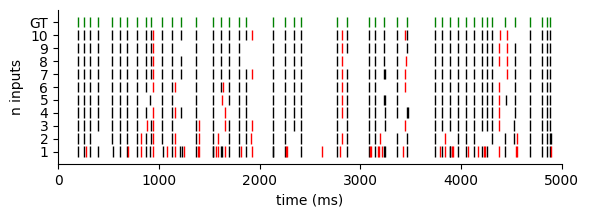

ID88


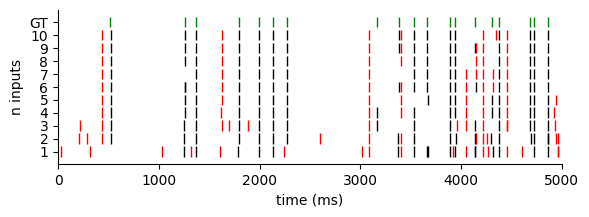

ID22


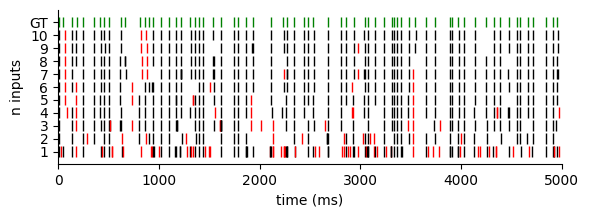

ID2


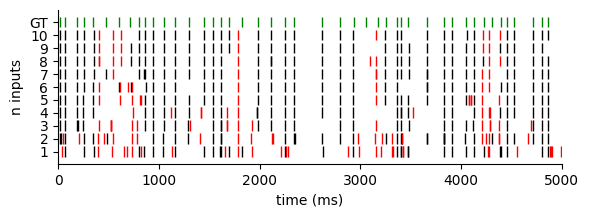

ID25


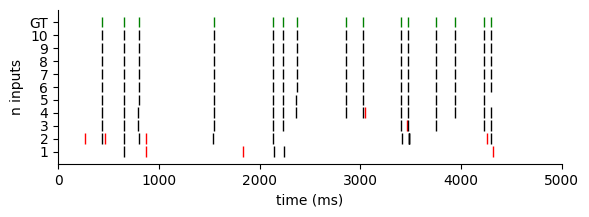

ID84


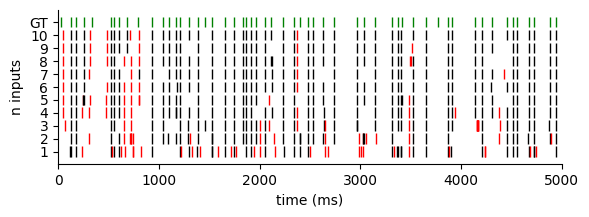

ID81


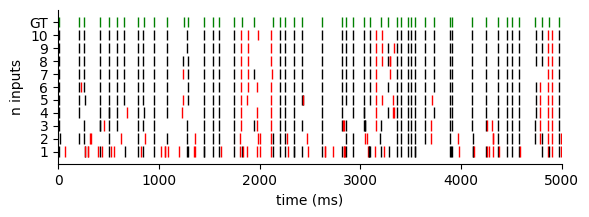

ID36


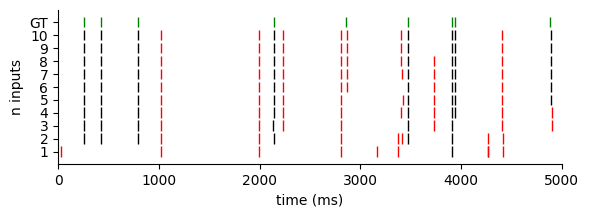

ID50


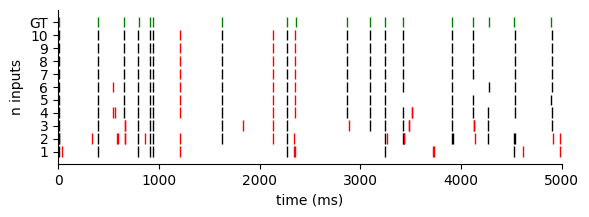

ID87


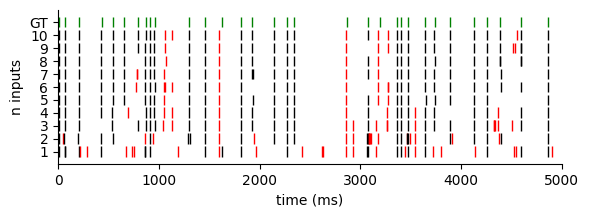

ID21


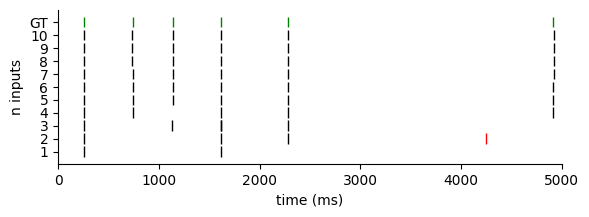

ID55


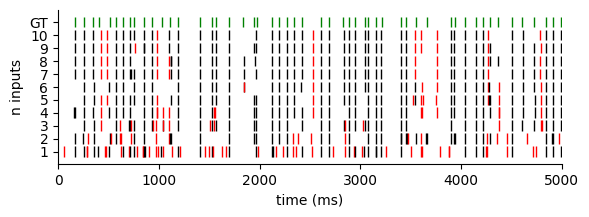

ID99


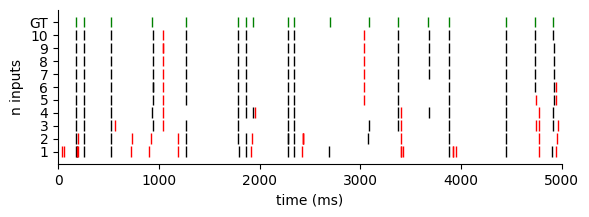

In [229]:
for seg_locID in seg_locIDs:
    print(seg_locID)

    ns = np.arange(1,11)

    fig, axes = plt.subplots(1, 1, figsize = (6.5, 2))
    
    gt_spikes = groundtruthspikes[seg_locID]

    for n in ns:
        spike_difs = [
        min([abs(spike-gt_spike) for gt_spike in gt_spikes]) for spike in spikes[seg_locID][n]
        ]
        colors = [spike_dif_thresh(spike_dif) for spike_dif in spike_difs]
        axes.vlines(spikes[seg_locID][n], n-.4, n+.4, color=colors, linewidth=1)

    axes.vlines(groundtruthspikes[seg_locID], 11-.4, 11+.4, color='green', linewidth=1)

    plt.xlim(0, 5000)

    plt.yticks(list(range(1,12)), list(range(1,11)) + ['GT'])

    plt.xlabel('time (ms)')
    plt.ylabel('n inputs')

    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    plt.show()

ID96


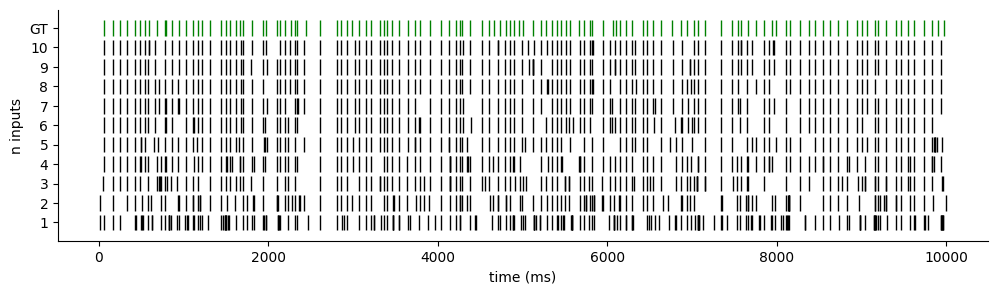

ID90


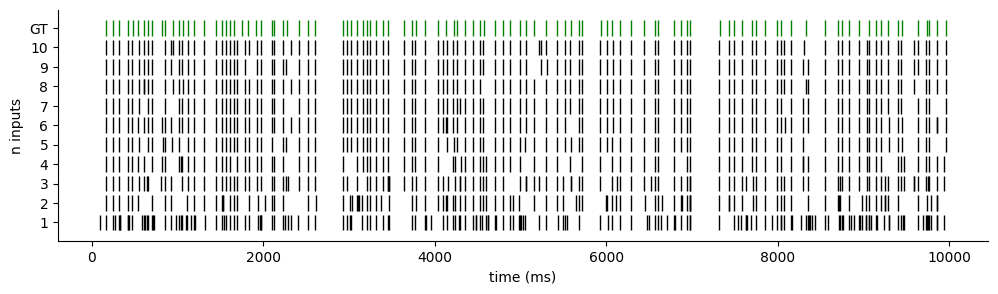

ID19


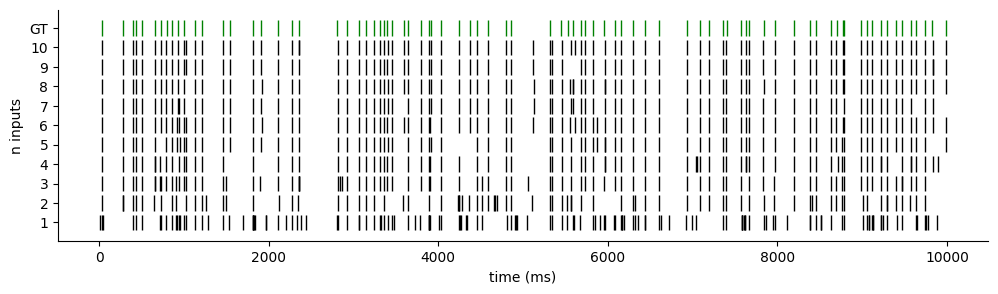

ID71


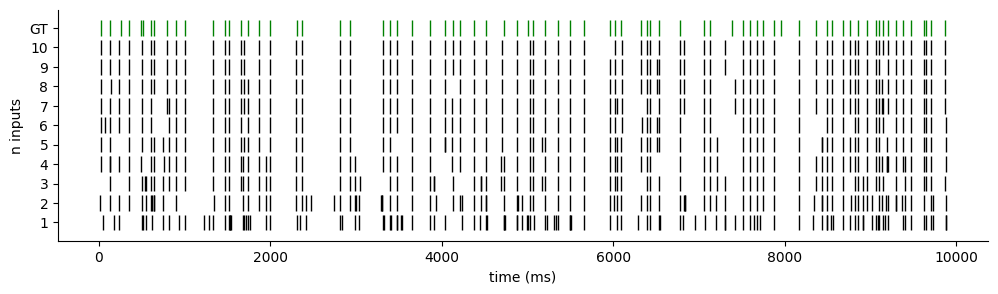

ID69


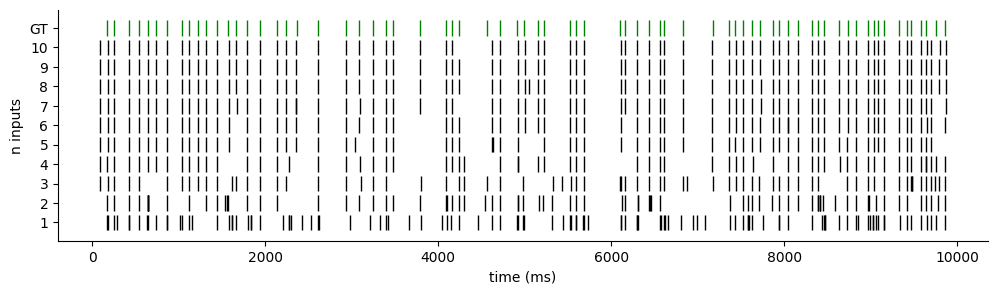

ID70


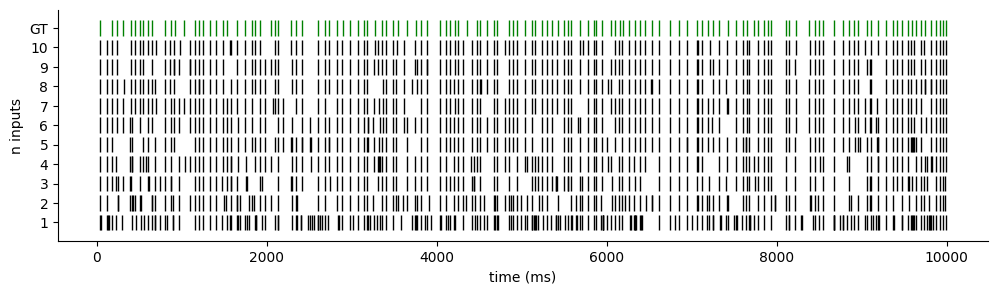

ID92


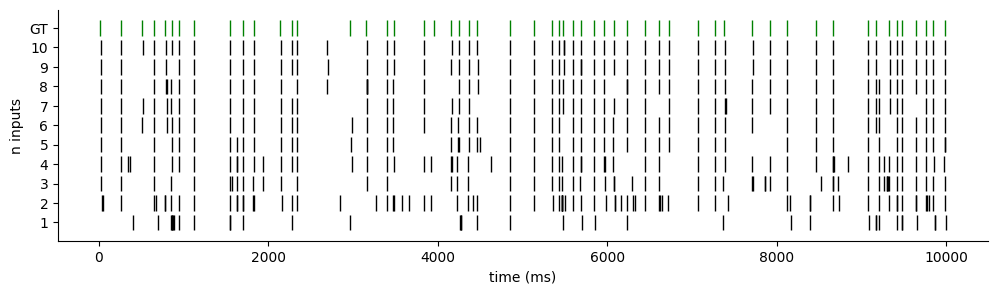

ID48


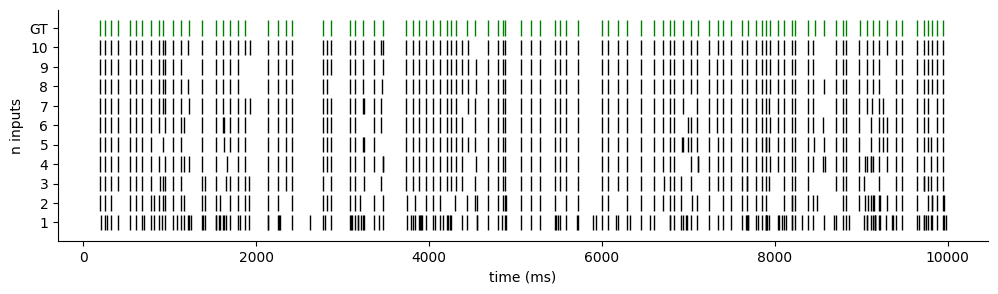

ID88


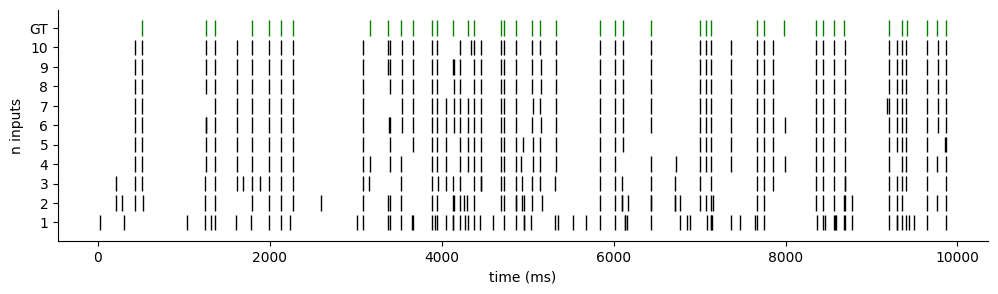

ID22


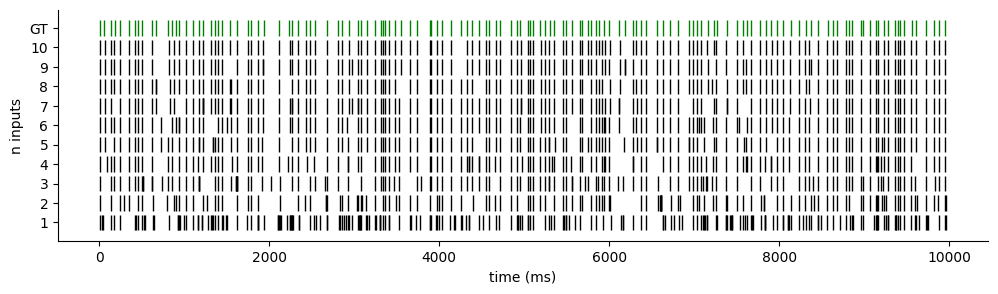

ID2


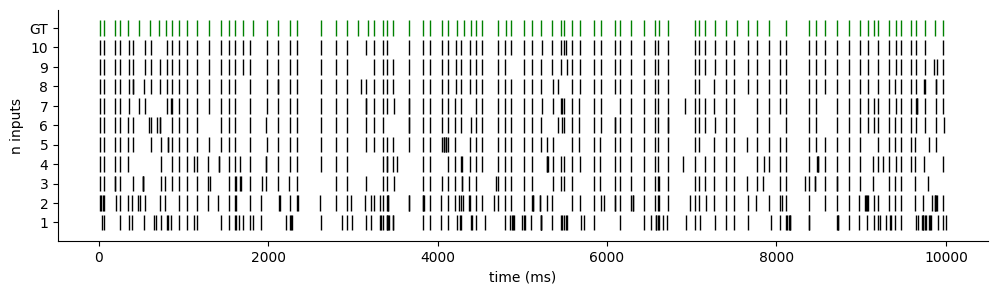

ID25


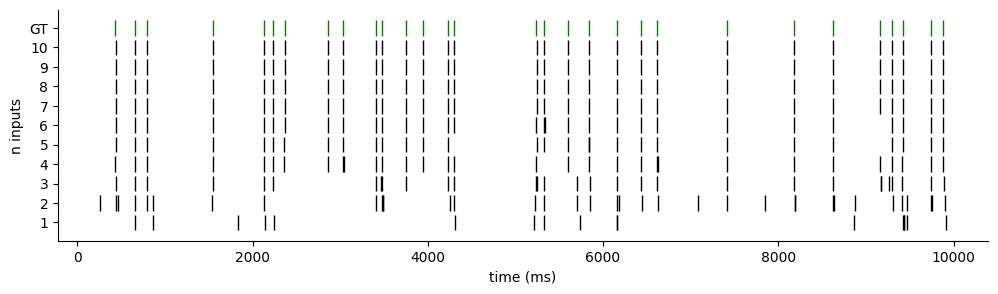

ID84


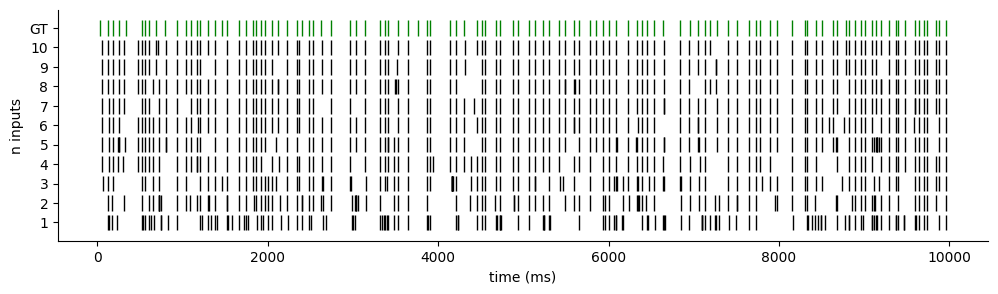

ID81


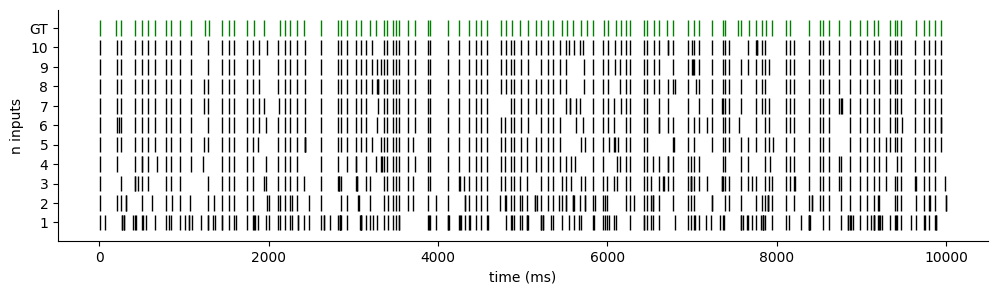

ID36


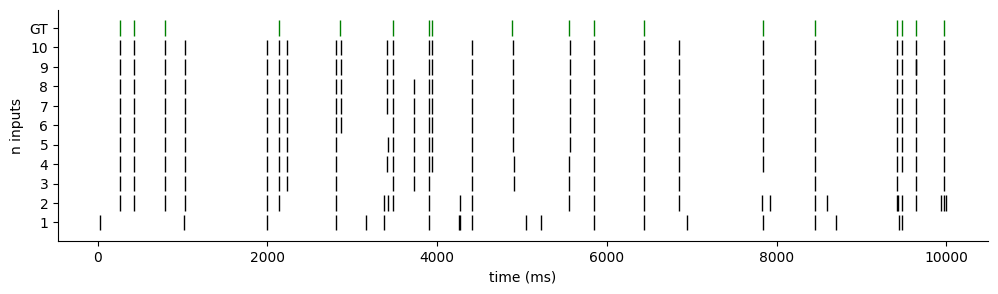

ID50


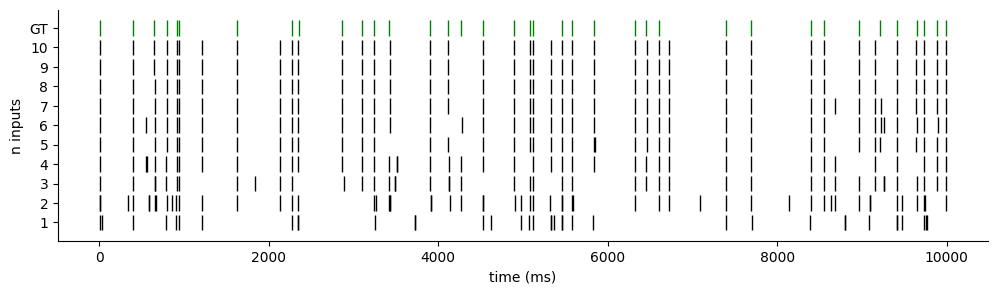

ID87


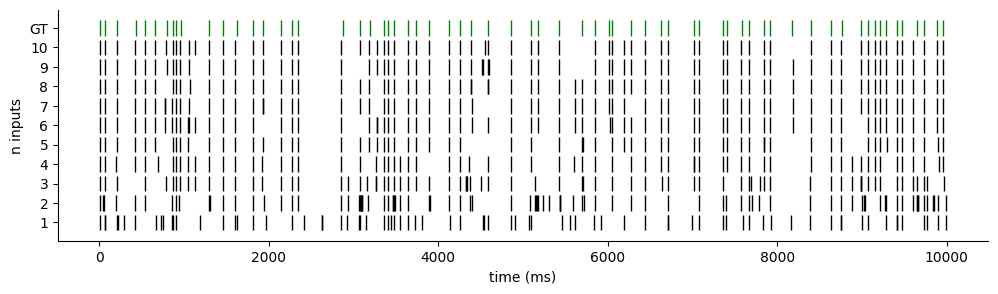

ID21


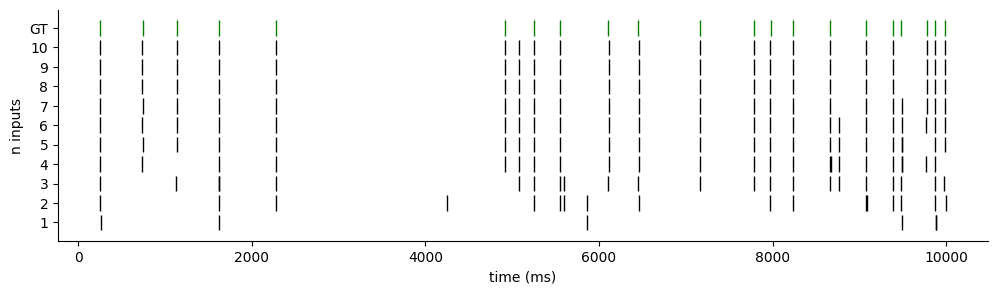

ID55


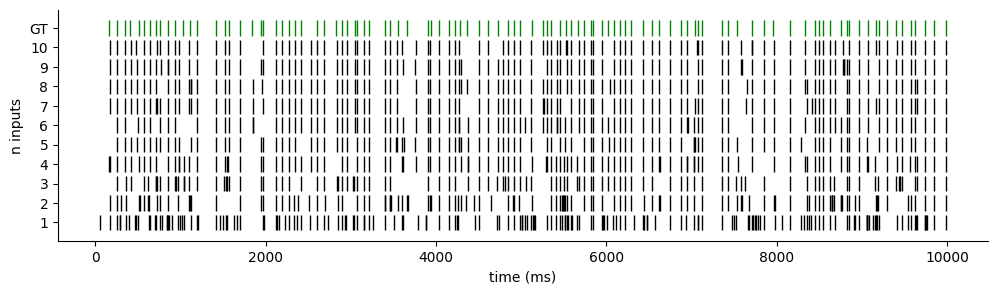

ID99


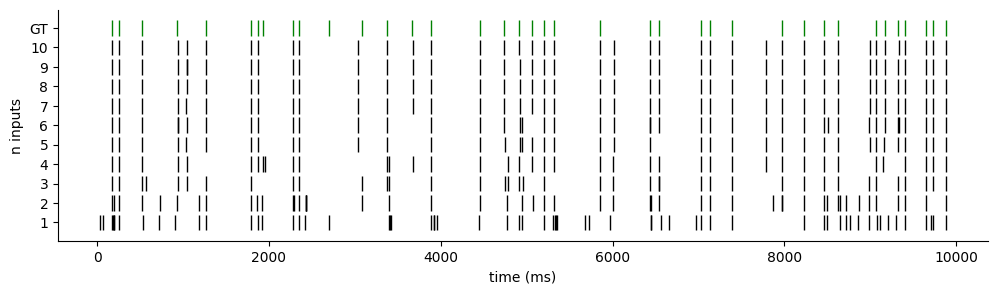

In [197]:
for seg_locID in seg_locIDs:
    print(seg_locID)

    ns = np.arange(1,11)

    fig, axes = plt.subplots(1, 1, figsize = (12, 3))

    for n in ns:
        axes.vlines(spikes[seg_locID][n], n-.4, n+.4, color='k', linewidth=1)

    axes.vlines(groundtruthspikes[seg_locID], 11-.4, 11+.4, color='green', linewidth=1)


    plt.yticks(list(range(1,12)), list(range(1,11)) + ['GT'])

    plt.xlabel('time (ms)')
    plt.ylabel('n inputs')

    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    plt.show()

## spike train distances

In [192]:
q = 1.0 / (10.0 * ms) # cost factor for shifting spikes in the victor purpura distance
tau = 100.0 * ms # time constant for the van rossum distance
sim_duration = 10000

In [193]:
nInputs_spike_trains = {}
groundtruth_spike_trains = {}

vr_dists = {}

groundtruth_spikerates = {}

for seg_locID in seg_locIDs:
    print(seg_locID)
    
    groundtruth_spike_trains[seg_locID] = neo.SpikeTrain(
        list(groundtruthspikes[seg_locID]) * ms, t_stop=duration*ms)
    groundtruth_spikerates[seg_locID] = len(list(groundtruthspikes[seg_locID])) / duration * 1000
    
    nInputs_spike_trains[seg_locID] = {}
    vr_dists[seg_locID] = {}
    for n in ns:
        nInputs_spike_trains[seg_locID][n] = neo.SpikeTrain(
            list(spikes[seg_locID][n]) * ms, t_stop=duration*ms)
        vr_dists[seg_locID][n] = van_rossum_distance(
            [groundtruth_spike_trains[seg_locID], 
            nInputs_spike_trains[seg_locID][n]], 
            tau)[0,1]

ID96
ID90
ID19
ID71
ID69
ID70
ID92
ID48
ID88
ID22
ID2
ID25
ID84
ID81
ID36
ID50
ID87
ID21
ID55
ID99


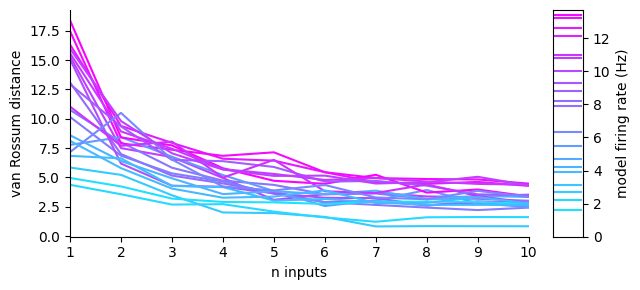

In [204]:
fig, axes = plt.subplots(1,2, figsize=(6.5, 3), gridspec_kw={'width_ratios': [15, 1]})
colors = pl.cm.cool(np.linspace(0,1,60))

for seg_locID in seg_locIDs:
    axes[0].plot(
        ns, [vr_dists[seg_locID][n] for n in ns],
        color=[
            np.interp(
                groundtruth_spikerates[seg_locID], 
                np.linspace(0, max(list(groundtruth_spikerates.values())), 60), colors[:,i]) for i in range(3)
        ]
    )
    
axes[0].set_xlim(1, 10)

axes[1].hlines(
    seg_loc_firing_rates.values(), .1, .9, 
    color = [
        [np.interp(
            firing_rate, 
            np.linspace(0, max(list(groundtruth_spikerates.values())), 60), colors[:,i]) for i in range(3)
    ] for firing_rate in list(seg_loc_firing_rates.values())]
)
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
axes[1].set_xticks([])
axes[1].set_ylabel('model firing rate (Hz)')

axes[1].set_ylim(0, 13.7)

axes[0].set_ylabel('van Rossum distance')
axes[0].set_xlabel('n inputs')

axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

fig.tight_layout()

plt.savefig(f'{figures_dir}nInputs_morpho_vrdists.svg', format='svg')

plt.show()

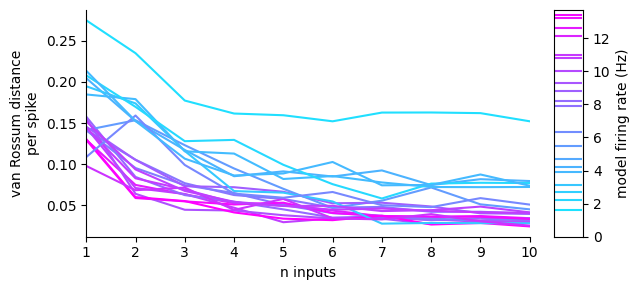

In [203]:
fig, axes = plt.subplots(1,2, figsize=(6.5, 3), gridspec_kw={'width_ratios': [15, 1]})
colors = pl.cm.cool(np.linspace(0,1,60))

for seg_locID in seg_locIDs:
    axes[0].plot(
        ns, [vr_dists[seg_locID][n] / (groundtruth_spikerates[seg_locID]*10) for n in ns], # divide by the number of spikes
        color=[
            np.interp(
                groundtruth_spikerates[seg_locID], 
                np.linspace(0, max(list(groundtruth_spikerates.values())), 60), colors[:,i]) for i in range(3)
        ]
    )
    
axes[0].set_xlim(1, 10)

axes[1].hlines(
    seg_loc_firing_rates.values(), .1, .9, 
    color = [
        [np.interp(
            firing_rate, 
            np.linspace(0, max(list(groundtruth_spikerates.values())), 60), colors[:,i]) for i in range(3)
    ] for firing_rate in list(seg_loc_firing_rates.values())]
)
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
axes[1].set_xticks([])
axes[1].set_ylabel('model firing rate (Hz)')

axes[1].set_ylim(0, 13.7)

axes[0].set_ylabel('van Rossum distance\nper spike')
axes[0].set_xlabel('n inputs')

axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

fig.tight_layout()

plt.savefig(f'{figures_dir}nInputs_morpho_vrdists_per_spike.svg', format='svg')

plt.show()

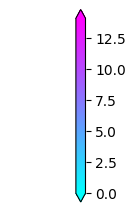

In [161]:
fig, ax = plt.subplots(1, 1, figsize = (1,2.5))
fraction = 1  # .05

norm = mpl.colors.Normalize(vmin = 0, vmax = max(list(groundtruth_spikerates.values())))
cbar = ax.figure.colorbar(
    mpl.cm.ScalarMappable(norm = norm, cmap = 'cool'),
    ax = ax, 
    extend = 'both',
)

ax.axis('off')
#plt.savefig(f'{figures_dir}nInputs_morpho_vr_dists_scalebar.svg', format='svg')
plt.show()